<h1>PRÁCTICA 1 - FUNDAMENTOS DE APRENDIZAJE AUTOMÁTICO</h1>
<h3>Realizada la práctica por:<br/>
    <ol>
    -Pablo Díez del Pozo<br/>
    -Alejandro Alcalá Álvarez
    </ol>
 </h3>
<h3>Grupo: 1461</h3>
<h3>Pareja: 01</h3>

In [932]:
#!/usr/bin/python3
# -*- coding: utf-8 -*-

<h3>Importaciones necesarias para la ejecucion del código</h3>
<p>Podemos observar todos los import necesarios que tenemos que realizar para que la ejecución de nuestro codigo funcione a la perfección, a continuación, explicaremos cada uno de los imports y para que son necesarios:</p>
<ol>
    <li>Random: se utiliza para hacer las secuencias de índices aleatorios para las particiones de entrenamiento y de clasificación.
    <li>Math: se utiliza para hacer la distribución normal para los atributos que sean continuos y asi poder calcular su probabilidad.
    <li>Numpy: Es la libreria mas utilizada en esta práctica, debido a que almacenamos los datos en una matriz numpy y guardamos las probabilidades posterioris de los atributos en un array de matrices de numpy.
    <li>ABC: se utiliza para haces clases y métodos abstractos.
    <li>Datos: se utiliza para importar toda la funcionalidad de nuestro modulo Datos.
    <li>Collections: se utiliza para contabilizar las probabilidades condicionadas y para ver cuantas clases hay en el fichero
    <li> SortedDict: se utiliza para ordenar el diccionario que creamos con las probabilidades a priori de cada clase
    <li>Sklearn: se utiliza para hacer el tercer apartado de esta práctica, donde nos da una implementación del algoritmo de Naive-Bayes
    <li>Pyplot: se utiliza en el último apartado de la práctica, donde nos da una implementación para pintar la curva ROC.
     

In [933]:
import random
import math
import numpy as np
from abc import ABCMeta, abstractmethod
from Datos import Datos
from collections import Counter
from sortedcontainers import SortedDict
from sklearn.metrics import confusion_matrix, auc
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from EstrategiaParticionado import Particion

<h3>Obtener los datos de los Distintos Dataset</h3>
<p>Aqui vamos a poder observar como vamos a codificar los datos que nos dan en un fichero a una matriz Numpy para poder tratar los datos para poder entrenarlos y clasificarlos con Naive-Bayes</p>
<p>Vamos a ver como llamando a la clase Datos y que en su constructor le ponemos la ruta del fichero se crea la matriz numpy de los datos, pero a demás de esa matriz también guardamos información necesaria para poder entrenarlos y clasificarlos correctamente. Por ejemplo, guardamos si los atributos son continuos o discretos.</p>
<p>A continuación, vamos a mostrar una ejecución para cada uno de los conjuntos de datos que nos dan para hacer Naive-Bayes. En la celda de abajo vereis la ejecución.</p>
<p> No se incluye el código de "Datos.py", ya que es el mismo que se utiliza en la P0.</p>

In [934]:
dataset1 = Datos('../Datasets/lenses.data')
print("==============MATRIZ NUMPY DEL CONJUNTO DE DATOS LENSES=====================")
print(dataset.datos)
print("============================================================================")

==============MATRIZ NUMPY DEL CONJUNTO DE DATOS LENSES=====================
[[0. 0. 0. 0. 2.]
 [0. 0. 0. 1. 1.]
 [0. 0. 1. 0. 2.]
 [0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 2.]
 [0. 1. 0. 1. 1.]
 [0. 1. 1. 0. 2.]
 [0. 1. 1. 1. 0.]
 [1. 0. 0. 0. 2.]
 [1. 0. 0. 1. 1.]
 [1. 0. 1. 0. 2.]
 [1. 0. 1. 1. 0.]
 [1. 1. 0. 0. 2.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 2.]
 [1. 1. 1. 1. 2.]
 [2. 0. 0. 0. 2.]
 [2. 0. 0. 1. 2.]
 [2. 0. 1. 0. 2.]
 [2. 0. 1. 1. 0.]
 [2. 1. 0. 0. 2.]
 [2. 1. 0. 1. 1.]
 [2. 1. 1. 0. 2.]
 [2. 1. 1. 1. 2.]]


In [935]:
dataset2 = Datos('../Datasets/tic-tac-toe.data')
print("==============MATRIZ NUMPY DEL CONJUNTO DE DATOS TIC-TAC-TOE================")
print(dataset2.datos)
print("============================================================================")

==============MATRIZ NUMPY DEL CONJUNTO DE DATOS TIC-TAC-TOE================
[[2. 2. 2. ... 1. 1. 1.]
 [2. 2. 2. ... 2. 1. 1.]
 [2. 2. 2. ... 1. 2. 1.]
 ...
 [1. 2. 1. ... 1. 2. 0.]
 [1. 2. 1. ... 1. 2. 0.]
 [1. 1. 2. ... 2. 2. 0.]]


In [936]:
dataset3 = Datos('../Datasets/german.data')
print("==============MATRIZ NUMPY DEL CONJUNTO DE DATOS GERMAN=====================")
print(dataset3.datos)
print("============================================================================")

==============MATRIZ NUMPY DEL CONJUNTO DE DATOS GERMAN=====================
[[ 0.  6.  4. ...  1.  0.  0.]
 [ 1. 48.  2. ...  0.  0.  1.]
 [ 3. 12.  4. ...  0.  0.  0.]
 ...
 [ 3. 12.  2. ...  0.  0.  0.]
 [ 0. 45.  2. ...  1.  0.  1.]
 [ 1. 45.  4. ...  0.  0.  0.]]


<h3>Apartado 1: Estrategia de Particionado</h3>
<p>En este apartado vamos a probar las dos estrategias de particionado de los datos que hemos tenido que implementar en esta práctica, las cuales son:</p>
    <ol>
        <p>- Validación Simple.</p>
        <p>- Validación Cruzada.</p>
    </ol>
<p>Nuestra estrategia de <strong>validación simple</strong> consiste en meterle un porcentaje por el cual queremos dividir el conjunto de datos en dos subconjuntos de datos, donde uno lo vamos a utilizar para entrenar y el otro lo vamos a utilizar para hacer la predicción con nuestro clasificador. En la celda de abajo mostraremos el código necesario para poder realizar correctamente la validacion simple.</p>
<p>Como podemos observar en el código de abajo de validación simple, lo que hacemos es que ponemos una semilla a random y decimos que el numero de particiones va a ser uno. A continuación, haremos un permutacion de numeros aleatorios entre el 0  y el número de datos que hay en el fichero. Por ultimo, lo que hacemos es que le creamos la partición que va a tener en su interior los dos subconjuntos de Train y Test. En esa permutación lo multiplicamos por el porcentaje que le hemos dado nosotros para crear los dos suboconjuntos.</p>
<p>Debajo de esta celda vamos a comprobar en como funciona  la validación simple con diferentes porcentajes para obtener el subconjunto de datos de Train y Test, en los diferentes conjuntos de datos </p>

In [937]:
class Particion():

  # Esta clase mantiene la lista de �ndices de Train y Test para cada partici�n del conjunto de particiones
  def __init__(self, train=[], test=[]):
    self.indicesTrain = train
    self.indicesTest = test

  def __str__(self):
    return "Train: {}\nTest:  {}".format(str(self.indicesTrain), str(self.indicesTest))

class EstrategiaParticionado:
  # Clase abstracta
  __metaclass__ = ABCMeta

  # Lista de las particiones
  def __init__(self, nombre=""):
    self.nombreEstrategia = nombre
    self.numeroParticiones = 0
    self.particiones = []

  # Atributos: deben rellenarse adecuadamente para cada estrategia concreta: nombreEstrategia, numeroParticiones, listaParticiones. Se pasan en el constructor

  @abstractmethod
  # TODO: esta funcion deben ser implementadas en cada estrategia concreta
  def creaParticiones(self, datos, seed=None):
    pass

class ValidacionSimple(EstrategiaParticionado):

  def __init__(self, porcentaje):
    self.porcentaje = porcentaje
    super().__init__("Validacion simple")

  # Crea particiones segun el metodo tradicional de division de los datos segun el porcentaje deseado.
  # Devuelve una lista de particiones (clase Particion)
  # TODO: implementar
  def creaParticiones(self, datos, seed=None):
    
    np.random.seed(seed)
    self.numeroParticiones = 1

    # Generamos una lista con todos los números de datos aleatorios
    indicesAleatorios = np.random.permutation(int(datos.numDatos))

    # Creamos la particion, en funcion del porcentaje especificado
    self.particiones = [Particion(indicesAleatorios[:int(datos.numDatos * self.porcentaje)],
                                  indicesAleatorios[int(datos.numDatos * self.porcentaje):])]

    return self.particiones

In [938]:
print(" -- VALIDACIÓN SIMPLE CON LENSES DATA 70% -- ")
estrategia = ValidacionSimple(0.7)
estrategia.creaParticiones(dataset1)
print(estrategia.particiones[0])


 -- VALIDACIÓN SIMPLE CON LENSES DATA 70% -- 
Train: [23  9  8  0 15 18 10 21 16 19 14  3  5  7  4 22]
Test:  [12 20  2 11 13 17  6  1]


In [939]:
print(" -- VALIDACIÓN SIMPLE CON TIC-TAC-TOE DATA 80% -- ")
estrategia = ValidacionSimple(0.75)
estrategia.creaParticiones(dataset2)
print(estrategia.particiones[0])

 -- VALIDACIÓN SIMPLE CON TIC-TAC-TOE DATA 80% -- 
Train: [173 142 907 512 752 956 133 565 312 808 313 529 584 381 395 815 477 685
 178 602 116 203 299 479 912 932 919 370 235  53 389 519  11 575 526 820
  76 205 305 334 285 244 884 295 470 923 652 593 260 623 627 483  28 913
 933 268 698 204  27 613 761  25 842 166 356 922 499  73 650 362 524 603
 405 682 174 355 280 228 445 156 545 347 219 282 443 749 642 102 751  67
   4  90 331  40 484 687 446  77 592 789 462 247 941 710 909 436 534 583
 544 643 876 269 864 390 138 949 847 439 935   6 672 766  91 918 391 134
 848  13 691 233 457 251 407 732 329  49 563 508 944 240 704 460 472 764
  69 791 667 170 514 293 521 191 695 629 834 438 348  93 254 676 469 806
 754 571 498 180 504 274 574 568 151 635 888 493 755 373 825  81 350 926
 794 618 164  87 306 826 550 874 291 231 937 799 377 346 659 435 411 803
 807 262 220 790 179 954 535  94 624 492 928 904 382  61 152 728 863 889
 886 647  18 408 399 202 182 322 838 678 898 787 212 590 419 924 8

In [940]:
print(" -- VALIDACIÓN SIMPLE CON GERMAN DATA 75% -- ")
estrategia = ValidacionSimple(0.75)
estrategia.creaParticiones(dataset3)
print(estrategia.particiones[0])

 -- VALIDACIÓN SIMPLE CON GERMAN DATA 75% -- 
Train: [516 410 479  48 130 864  16 550 695  73 134 246  15 427  23 737 318 611
 456  65 346 614 453 997 436 113 883 899 243 966 748 424 591  55 499 701
 375 564 661 944 849 489 785 874 284 642 710 267 329 744 822 897 496 281
 419 439  39 594 223 773 351 880 866 380 482 494 625 242 306 925 368 754
  33 878 544 600 647 750 248 824 801 562  47 228 138 177 188 369 728 753
 417 511 596 355 595 741 821 493  21 696 546 373 859 549 632  46 432 658
 886 580 464 644 840  66 277 557 289  78 716 828  18 746 505 761 397 685
 868 650 558 504 876 694 574 330 514 816 843 796  42 856 163 599 920 911
  57 510 183 190 317 818  22 297 934 909  38 906 837 245 589 879 724 234
 408 450  93 778 729  75 205 141 648 407 980 115 635 872 722 437 780 639
 584 683  89 328 310 825 521 403 128   2 161 327   0 255   9 636 362 295
 268 517 791 698 795 951 358 214 217 940 143 735 480 910 195  36 231 534
 264 535 755 382 561 942 829 280 303  97 846 211 900 553 560 889 416 77

<p>Nuestra estrategia de <strong>validación cruzada</strong> consiste en dividir nuestro conjunto de datos en particiones de Train y Test como en validación simple, pero este proceso lo vamos a hacer K veces, para que todos los datos esten presenten en los dos subconjunto de datos para poder obtener una mejora a la hora de entrenar y clasificar.A continuación, mostraremos nuestra implementación de la validación cruzada; donde vamos a hacer K veces las divisiones del conunto de datos y si por algún motivo nuestra división de todos los subconjuntos no es perfecta balancearemos los datos sobrantes para poder entrenarlos y clasificarlos.</p>

In [941]:
class ValidacionCruzada(EstrategiaParticionado):

  # Crea particiones segun el metodo de validacion cruzada.
  # El conjunto de entrenamiento se crea con las nfolds-1 particiones y el de test con la particion restante
  # Esta funcion devuelve una lista de particiones (clase Particion)
  # TODO: implementar

  def __init__(self, k):
    self.k = k
    super().__init__("Validacion cruzada")

  def creaParticiones(self, datos, seed=None):
    
    np.random.seed(seed)

    self.numeroParticiones = self.k

    # Generamos una lista con todos los números de datos aleatorios
    indicesAleatorios = np.random.permutation(int(datos.numDatos))

    # Hallamos el tamaño de cada bloque
    tamBloque = int(datos.numDatos / self.k)

    datosSobran = datos.numDatos - (tamBloque * self.k)
    count = 0
    for i in range(self.k):

      train = np.delete(indicesAleatorios, range(i * tamBloque, (i + 1) * tamBloque))
      test = indicesAleatorios[i * tamBloque:(i + 1) * tamBloque]

      # Caso en el que la cuenta es justa
      if datosSobran == 0:
        self.particiones.append(Particion(train, test))

      # Contemplamos el caso de que la division para sacar el numero de subconjuntos no fuese entera
      if datosSobran > 0:
        count += 1
        particionTest = np.append(test, train[(datos.numDatos - tamBloque) - i - 1])
        particionTrain = np.delete(train, (datos.numDatos - tamBloque) - i - 1)
        datosSobran -= 1
        self.particiones.append(Particion(particionTrain, particionTest))

<p>A continuación, mostraremos la ejecución de nuestra estrategia de partcionado validación simple o también llamada K-fold, con los diferentes conjuntos de datos y con diferentes K's. Vamos poder observar en la salida de nuestra celda que todos los valores van a estar una vez en la partición de Test.</p>


In [942]:
print(" -- VALIDACIÓN CRUZADA CON LENSES DATA K=5 -- ")
estrategia = ValidacionCruzada(5)
estrategia.creaParticiones(dataset1)
for particion in estrategia.particiones:
    print(particion)

 -- VALIDACIÓN CRUZADA CON LENSES DATA K=5 -- 
Train: [23 19  7 12  5  1  4  9  3  8 18 10 22 17 13 16  0 11 21]
Test:  [15 14  6  2 20]
Train: [15 14  6  2  5  1  4  9  3  8 18 10 22 17 13 16  0 11 20]
Test:  [23 19  7 12 21]
Train: [15 14  6  2 23 19  7 12  3  8 18 10 22 17 13 16  0 21 20]
Test:  [ 5  1  4  9 11]
Train: [15 14  6  2 23 19  7 12  5  1  4  9 22 17 13 16 11 21 20]
Test:  [ 3  8 18 10  0]
Train: [15 14  6  2 23 19  7 12  5  1  4  9  3  8 18 10  0 11 21 20]
Test:  [22 17 13 16]


In [943]:
print(" -- VALIDACIÓN CRUZADA CON TIC-TAC-TOE DATA K=4 -- ")
estrategia = ValidacionCruzada(5)
estrategia.creaParticiones(dataset2)
for particion in estrategia.particiones:
    print(particion)

 -- VALIDACIÓN CRUZADA CON TIC-TAC-TOE DATA K=4 -- 
Train: [170 552 825 358 594 676 943 578 479 470 824 593 679 569 883 214 325 472
 844 868 819 719 428 639 851 464  79  12 525 401   2 462 127 128 282 618
 495 206 600  72  52 754 190 941 801 604 211  80 776 218 134 224 384 278
 288 777 544 634 275 865 924 138 745 755 104 633 699 753 891 923 931 362
 673 571 869 286 829 222  71 123 107 625 424 260 367 626 452 368  37 149
 305 610 460 559   5 649 512 304 327 277 212  38 257   8 292 296 765 946
  32 697 888  78 348 576 711 417 778 871 480  48 320 620  92  20  10  86
 528 875 900 567 560 700 328 514 249 572 596 656 137 381 459 172 481 245
 437 779 194 131 642 496  11 342 650 323 308 219 827 252 716 549 202 498
 337  19 795 863  42 326 167 756 272 379 706 785 758 944  55 743  88 757
  69 768 907 313 804 484 261  24 925 105 936 341 457   3 562 786  65 165
 161 740 688 289 471 784 114 436 396   1  25 468 741  62 112 636 823 773
 441 483 407 391  49 246 630 248 347  87 474 780 335 232  99 199 

In [944]:
print(" -- VALIDACIÓN CRUZADA CON GERMAN DATA K=4 -- ")
estrategia = ValidacionCruzada(4)
estrategia.creaParticiones(dataset3)
for particion in estrategia.particiones:
    print(particion)

 -- VALIDACIÓN CRUZADA CON GERMAN DATA K=4 -- 
Train: [ 18  92 694 888 452 726 641 860 301 706 945 949 464 465 910 751 976 588
 230 602 253 101 380  31 928 338 210 788 164 415 607 361 916 989 431 618
 349 865 174 421  86 836 975 768 612  45 500 911 796 130 625 934 383 311
 778 175 761 168 590  58 963 355 769 727 571 718 100 555 703 548 771  83
 109 966 523 497 192 867 461 743 426 151 732 483 398 981 547 940 515 856
 809  99 960 959  97 988 319 429 919 845 848 240 972 819 360 929 806 927
 258 315 628 576 345 843   0 884 636 290   4 512  54 146 887 247 705  11
 930  78 249 558 931 518 654 148 953 886 920 239 979 637 573 691 179 690
 858 632 291 219 651 399 575 987 801 813 938 951 237 792  40 119 829 781
 730 344 619 763 165 266 683 810 485 354 877 561 698 488 630 950 587 525
 104 529 394 702 572 747 847 593   6 454 814 740 451  32 166 557 816 455
 800 685  35 830 403 121  87 269 430 106 872 370 591 185 284  96 376 840
 655 970 400 815 138 762 221 335 644 735 484 915 528 811 849 839 855 7

<h3>Apartado 2: Naive-Bayes</h3>
<p>Es un clasificador de datos que se basa en la regla de Bayes. Donde primero vamos a dividir el conjunto de datos y poder particionarlo en dos subconunto de datos con validación simple o en varios subconjunto de datos con validación cruzada. En el código que mostramos a continuación es lo que van hacer todos los clasificadores que podemos implementar. Los métodos de entrenamiento y clasifica cada clasificador lo hace el clasificador debido a que los métodos que van a utilizar son únicos y los tenemos que implementar en las clases especificas de cada clasificador.</p>
<p>El método <strong>error</strong> va a comprobar los errores que ha obtenido nuestro clasificador, para ver el error que hemos obtenido se hace comparando la última columna de nuestra matriz de datos con la predicción que hemos obtenido en el método de clasifica del clasificador. Si es dintinto la predicción con la última columna de los datos le sumamos uno y lo vamos a dividir entre el número de lineas que tiene el subconjunto de datos Test.</p>
<p>El método <strong>validación</strong> lo que va hacer es realizar los métodos de entrenamiento, clasifica y calcula error del clasificador seguido sin ninguna interrupcion. El método va a comprobar si le estan pasando validación simple o cruzada con el número de partciones que tiene. Si el tamaño es igual a 1 va a llamar a los métodos mencionados anteriormente y va a devolver el error que ha obtenido tras el entrenamiento y la clasificación. Si el tamaño es mayor a 1 hacemos un bucle que cubra todas las partciones para entrenarlas, clasificarlas y obtener su error, despues de la realización de esos métodos vamos a hacer la media aritmetica de todos los errores obtenidos con las diferentes particiones que tenemos en nuestra estrategia.</p>
<p>El método <strong>matrizConfusion</strong> genera la matriz de confusión utlizando el método confusion_matriz() de SKLearn y calcula las tasas de falsos negativos, verdaderos positivos, verdaderos negativos y falsos positivos, añadiendo las dos tasas necesarias para el análisis ROC a unas listas.</p>
<p>El método <strong>curvaROC</strong> únicamente pinta la curva ROC correspondiente a la clasificación realizada, utliza los datos de las listas generadas en <strong>matrizConfusion</strong> para obtener los valores.</p>

In [945]:
class Clasificador:
  # Clase abstracta
  __metaclass__ = ABCMeta

  # Metodos abstractos que se implementan en casa clasificador concreto
  @abstractmethod
  # TODO: esta funcion debe ser implementada en cada clasificador concreto
  # datosTrain: matriz numpy con los datos de entrenamiento
  # atributosDiscretos: array bool con la indicatriz de los atributos nominales
  # diccionario: array de diccionarios de la estructura Datos utilizados para la codificacion de variables discretas
  def entrenamiento(self, datos, datosTrain, atributosDiscretos, diccionario):
    pass

  @abstractmethod
  # TODO: esta funcion debe ser implementada en cada clasificador concreto
  # devuelve un numpy array con las predicciones
  def clasifica(self, datosTest, atributosDiscretos, diccionario):
    pass

  # Obtiene el numero de aciertos y errores para calcular la tasa de fallo
  # TODO: implementar
  def error(self, datos, pred):
    # Aqui se compara la prediccion (pred) con las clases reales y se calcula el error
    i = 0
    real = datos[:, -1]
    error = 0
    for i in range(len(real)):
      if real[i] != pred[i]:
        error += 1
    err = (error) / (len(real) + 0.0)
    return err

  # Realiza una clasificacion utilizando una estrategia de particionado determinada
  # particionado : estrategia de validacion que queremos utilizar
  # dataset : clase de tipo Datos que utilizamos para entrenar y clasificar el modelo
  # clasificador: instancia del clasificador que se va a usar
  # TODO: implementar esta funcion
  def validacion(self, particionado, dataset, clasificador, seed: object = None):

    # Creamos las particiones siguiendo la estrategia llamando a particionado.creaParticiones
    # - Para validacion cruzada: en el bucle hasta nv entrenamos el clasificador con la particion de train i
    # y obtenemos el error en la particion de test i
    # - Para validacion simple (hold-out): entrenamos el clasificador con la particion de train
    # y obtenemos el error en la particion test. Otra opci�n es repetir la validaci�n simple un n�mero especificado de veces, obteniendo en cada una un error. Finalmente se calcular�a la media.
    errores = 0
    # particionado.creaParticiones(dataset, seed)
    # Comprobamos si es por validación cruzada o simple, por la longitud de la lista de particiones
    particionado.particiones = []
    particionado.creaParticiones(dataset)
   
    # Validación Simple
    if len(particionado.particiones) == 1:
      clasificador.entrenamiento(dataset, particionado.particiones[0].indicesTrain)
      pred = clasificador.clasifica(dataset, particionado.particiones[0].indicesTest)
      ret = self.error(dataset.extraeDatos(particionado.particiones[0].indicesTest), pred)
      if ret > 0:
        return ret
      else:
        return 0
      
    # Validación Cruzada
    else:
      lista_error = []
      for particion in particionado.particiones:
        clasificador.entrenamiento(dataset, particion.indicesTrain)
        pred = clasificador.clasifica(dataset, particion.indicesTest)
        ret = self.error(dataset.extraeDatos(particion.indicesTest), pred)
        lista_error.append(ret)
      return np.mean(lista_error),np.std(lista_error)


  def matrizConfusion(self, dataset, datosTest, prediccion):

    # Calculamos la matriz de confusion utlizando sk-learn. Solo se calcula en el caso de que la clasificacion sea binaria.
    testData = dataset.extraeDatos(datosTest)
    clase_real = testData[:, -1]

    matriz = confusion_matrix(prediccion, clase_real)

    # La funcion ravel() devuelve todas las estadisticas relacionadas con la matriz de confusion
    tn, fp, fn, tp = matriz.ravel()


    # Calculamos las tasas extraídas de la matriz de confusión
    tpr = tp / (tp + fn)
    fpr = fp / (fp + fn)

    self.lista_tpr.append(tpr)
    self.lista_fpr.append(fpr)

    return matriz

  def curvaROC(self):

    x = np.linspace(0, 1, 100)
    plt.plot(x, x, c='blue')
    for i in range(len(self.lista_fpr)):
        plt.plot(self.lista_fpr[i],self.lista_tpr[i],'ro')
    plt.show()

<h3>Implementación del Clasificador Naive-Bayes</h3>
<p>En la siguiente celda vamos a poder observar el codigo de entrenamiento y clasifica del clasificador de Naive-Bayes, a continuación explicaremos brevemente el funcionamiento de cada uno de los métodos especificos del clasificador. En este claisificador podemos aplicar la regla de Laplace, que es si obtenemos un cero en algunas de las mátrices de conteos de los datos, es decir, a la hora de calcular P(D|H), tendremos que sumar 1 a todas las celdas de conteos de esa P(D|H).</p>
<p>El método <strong>entrenamiento</strong>, lo primero que hace este método es obtener las probabilidades a priori de las clases que hay en el subconjunto de Test. Al calcular esas probabbilades las introducimos en un diccionario para poder utilizarlas más tarde. Ahora vamos a calcular la P(D|H)que se va a calcular de diferentes maneras para datos continuos o discretos
    <ol>
        <li><strong>Atributos discretos</strong>: se calcula haciendo los conteos de las veces que sale la P(D|H) en el subconjunto de datos Train.</li>
        <li><strong>Atributos continuos</strong>: se calcula la media y desviación tipica del subconjunto de datos Train.</li>
    </ol>
Todo esto se mete en una matriz que tiene los diferentes datos y las diferentes clases del conjunto de datos, donde esa matriz la vamos a utilizar para calcular las probabilidades a posteriori con todos las datos que tiene las matrices que hemos creado.</p>
<p>El método <strong> clasifica</strong> dependiendo de los datos que vamos obteniendo del subconjunto de datos de Test, y vamos a obtener las diferentes probabilidades de las distintas clases que tenemos el problema si nos llega ese dato. Esas probabilidades las guardamos en una lista para luego multiplicarlas por los a priori y poder coger la clase que de más probabilidad para guardarla en la lista de las predicciones de nuestro clasificador Naive-Bayes y así despues obtener el error que hemos obtenenido. Este método tambien clasifica de manera distinta los atributos discretos y continuos:
    <ol>
        <li><strong>Atributos discretos</strong>: se calcula obteniendo el número que hay en la matriz de probabilidades a posteriori que hemos creado anteriormente.</li>
        <li><strong>Atributos continuos</strong>: se calcula haciendo la ecuación de la distribución normal.
   </ol>
 </p>

In [946]:
class ClasificadorNaiveBayes(Clasificador):

  def __init__(self, laplace):
    self.laplace = laplace
    self.lista_fpr = []
    self.lista_tpr = []

  def entrenamiento(self, dataset, datosTrain):

    # Cargamos todos los datos de la clase del dataset desde la matriz de datos
    clasesTrain = dataset.extraeDatos(datosTrain)
    self.numClases = clasesTrain[:, -1]

    # Contamos las apariciones de cada uno para luego calcular la probabilidad a priori de cada clase
    counter = Counter(self.numClases)

    # Calculamos la probabilidad de la clase y lo metemos en un diccionario ordenado segun el numero
    # correspondiente a cada clase asignado en el diccionario
    self.dictPrioris = {}
    for k in counter:
      k = int(k)
      counter[k] = counter[k] / len(self.numClases)
      self.dictPrioris[k] = counter[k]

    # Aqui ordenamos el diccionario para que esten en el mismo orden de como extraemos los datos del dataset
    self.dictPrioris = SortedDict(self.dictPrioris)

    # Calcular tablas de probabilidades del entrenamiento. Tenemos que calcular por cada atributo una cuenta
    # de las apariciones en cada clase
    # Creamos una lista de matrices, donde vamos almacenar todos los datos que hemos obtenido en los datos de Test
    self.posteriori = np.zeros(len(dataset.nombreAtributos) - 1, dtype=object)

    # Recorremos todos los datos de la matriz sin llegar a la clase
    for i in range(len(dataset.nombreAtributos) - 1):

      # Si el dato que obtenemos es Nominal haremos el recuento de todas las veces que sale la P(D|H)
      if dataset.nominalAtributos[i] == True:

        # Creamos una matriz de tamaño X: Número de Atributos menos la clase Y: Número de clases
        post = np.zeros((len(dataset.listaDicts[i]), len(dataset.listaDicts[-1])))

        # Aqui contamos todos las datos que queremos del datos Train para construir la matriz de entrenamiento
        for c in range(len(dataset.listaDicts[-1])):
          datosEnt = dataset.extraeDatos(datosTrain)
          dat = datosEnt[:, i]
          repes = Counter(dat[datosEnt[:, -1] == c])
          for r in repes:
            post[int(r), c] = repes[r]
          if self.laplace == True:
            self.posteriori[i] = post + 1
          else:
            self.posteriori[i] = post

      # Si el dato es Continuo obtendremos la media y la desviación tipica de la clase
      else:

        # Creamos una matriz de X: Los datos de Media y Desivación típica Y: Número de clases
        post = np.zeros((2, len(dataset.listaDicts[-1])))

        # Aqui obtenemos la media y desviación tipica de cada clase, despues de tener los datos de entrenamiento
        for c in range(len(dataset.listaDicts[-1])):
          datosEnt = dataset.extraeDatos(datosTrain)
          dat = datosEnt[:, i]
          datos = dat[datosEnt[:, -1] == c]
          post[0][c] = np.mean(datos)
          post[1][c] = np.std(datos)
        self.posteriori[i] = post


    # Calculamos los valores de los posteriori de todos las tablas anteriores
    for i in range(len(dataset.listaDicts) - 1):
      if dataset.nominalAtributos[i] == True:
        self.posteriori[i] /= sum(self.posteriori[i])

  def clasifica(self, dataset, datosTest):
    acum_probs = 1
    self.prediccion = []
    datTest = dataset.extraeDatos(datosTest)

    # Ahora vamos a estudiar la probabilidad de la clase con los datos obtenidos en el entrenamiento
    # Recorremos todos las datos de la matriz de los datos Test
    for dato in datTest:
      mapa = []
      # Aqui obtenemos los prioris de cada clase para poder obtener la probabilidad de cada una
      for clase in range(len(self.dictPrioris)):
        listaVerosimilitudes = []
        # Aqui obtenemos cada valor posteriori de nuestro entrenamiento de los datos, es decir, P(D|H)
        for atributo in range(len(self.posteriori)):
          if dataset.nominalAtributos[atributo] == True:
            prob = self.posteriori[atributo][int(dato[atributo])][clase]
            listaVerosimilitudes.append(prob)

          # Aqui obtenemos la probabilidad de los atibutos continuos
          else:
            # Hacemos la formula de la distribucion normal
            exp1 = 1 / (self.posteriori[atributo][1][clase] * math.sqrt(2 * math.pi))
            exp2 = np.power((dato[atributo] - self.posteriori[atributo][0][clase]), 2)
            exp3 = np.power(self.posteriori[atributo][1][clase], 2)
            exp4 = exp2 / exp3
            exp4 = math.exp((-1 / 2) * exp4)
            prob = exp1 * exp4
            listaVerosimilitudes.append(prob)

        for verosimilitud in listaVerosimilitudes:
          acum_probs *= verosimilitud
        acum_probs *= self.dictPrioris.get(clase)
        mapa.append(acum_probs)
        acum_probs = 1

      # Aqui obtenemos la predicción de mayor probabilidad y la guardamos en nuestra lista de predicciones
      self.prediccion.append(np.argmax(mapa))


    # Devolvemos la lista con la predicción de nuestro clasifica
    return self.prediccion

<p>A continuación, vamos a mostrar una ejecución del claisificador de Naive-Bayes con las diferentes validaciones y los diferentes conjuntos de datos que tenemos, al final de esto mostraremos la probabilidad que hemos obtenido.</p>
<p>Destacar que en el caso de <Strong>German.data</Strong> es en el único dataset en el que se realiza el cálculo de probabilidades utilizando también la distribución Normal, ya que cuenta con atributos continuos.</p>

Generamos las estrategias de validación de nuevo y se aplicaran para todos los casos.

In [947]:
estrategia_simple_1 = ValidacionSimple(0.7)

estrategia_simple_2 = ValidacionSimple(0.7)

estrategia_simple_3 = ValidacionSimple(0.7)

print(" -- NAIVE-BAYES CON LENSES DATA -- ")
print(" -- CON LAPLACE Y VALIDACION SIMPLE -- ")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia_simple_1,dataset1,nb)
print("ERROR OBTENIDO:",error)
print(" -- SIN LAPLACE Y VALIDACION SIMPLE -- ")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia_simple_1,dataset1,nb)
print("ERROR OBTENIDO:",error)
print()
print(" -- NAIVE-BAYES CON TIC-TAC-TOE DATA -- ")
print(" -- CON LAPLACE Y VALIDACION SIMPLE -- ")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia_simple_2,dataset2,nb)
print("ERROR OBTENIDO:",error)
print(" -- SIN LAPLACE Y VALIDACION SIMPLE -- ")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia_simple_2,dataset2,nb)
print("ERROR OBTENIDO:",error)
print()
print(" -- NAIVE-BAYES CON GERMAN DATA -- ")
print(" -- CON LAPLACE Y VALIDACION SIMPLE -- ")
nb = ClasificadorNaiveBayes(True)
error = nb.validacion(estrategia_simple_3,dataset3,nb)
print("ERROR OBTENIDO:",error)
print(" -- SIN LAPLACE Y VALIDACION SIMPLE --")
nb = ClasificadorNaiveBayes(False)
error = nb.validacion(estrategia_simple_3,dataset3,nb)
print("ERROR OBTENIDO:",error)


 -- NAIVE-BAYES CON LENSES DATA -- 
 -- CON LAPLACE Y VALIDACION SIMPLE -- 
ERROR OBTENIDO: 0.375
 -- SIN LAPLACE Y VALIDACION SIMPLE -- 
ERROR OBTENIDO: 0.125

 -- NAIVE-BAYES CON TIC-TAC-TOE DATA -- 
 -- CON LAPLACE Y VALIDACION SIMPLE -- 
ERROR OBTENIDO: 0.2951388888888889
 -- SIN LAPLACE Y VALIDACION SIMPLE -- 
ERROR OBTENIDO: 0.3090277777777778

 -- NAIVE-BAYES CON GERMAN DATA -- 
 -- CON LAPLACE Y VALIDACION SIMPLE -- 
ERROR OBTENIDO: 0.24
 -- SIN LAPLACE Y VALIDACION SIMPLE --
ERROR OBTENIDO: 0.24333333333333335


In [948]:
estrategia_cruzada_1 = ValidacionCruzada(4)

estrategia_cruzada_2 = ValidacionCruzada(4)

estrategia_cruzada_3 = ValidacionCruzada(4)


print(" -- NAIVE-BAYES CON LENSES DATA -- ")
print(" -- CON LAPLACE Y VALIDACION CRUZADA -- ")
nb = ClasificadorNaiveBayes(True)
error, desv = nb.validacion(estrategia_cruzada_1,dataset1,nb)
print("ERROR OBTENIDO:",error)
print("DESV. TIPICA OBTENIDA:",desv)
print(" -- SIN LAPLACE Y VALIDACION CRUZADA -- ")
nb = ClasificadorNaiveBayes(False)
error, desv = nb.validacion(estrategia_cruzada_1,dataset1,nb)
print("ERROR OBTENIDO:",error)
print("DESV. TIPICA OBTENIDA:",desv)
print()

print(" -- NAIVE-BAYES CON TIC-TAC-TOE DATA -- ")
print(" -- CON LAPLACE Y VALIDACION CRUZADA -- ")
nb = ClasificadorNaiveBayes(True)
error, desv = nb.validacion(estrategia_cruzada_2,dataset2,nb)
print("ERROR OBTENIDO:",error)
print("DESV. TIPICA OBTENIDA:",desv)
print("-- SIN LAPLACE Y VALIDACION CRUZADA --")
nb = ClasificadorNaiveBayes(False)
error, desv = nb.validacion(estrategia_cruzada_2,dataset2,nb)
print("ERROR OBTENIDO:",error)
print("DESV. TIPICA OBTENIDA:",desv)
print()

print("-- NAIVE-BAYES CON GERMAN DATA --")
print("-- CON LAPLACE Y VALIDACION CRUZADA --")
nb = ClasificadorNaiveBayes(True)
error, desv = nb.validacion(estrategia_cruzada_3,dataset3,nb)
print("ERROR OBTENIDO:",error)
print("DESV. TIPICA OBTENIDA:",desv)
print("-- SIN LAPLACE Y VALIDACION CRUZADA --")
nb = ClasificadorNaiveBayes(False)
error, desv = nb.validacion(estrategia_cruzada_3,dataset3,nb)
print("ERROR OBTENIDO:",error)
print("DESV. TIPICA OBTENIDA:",desv)

 -- NAIVE-BAYES CON LENSES DATA -- 
 -- CON LAPLACE Y VALIDACION CRUZADA -- 
ERROR OBTENIDO: 0.25
DESV. TIPICA OBTENIDA: 0.08333333333333333
 -- SIN LAPLACE Y VALIDACION CRUZADA -- 
ERROR OBTENIDO: 0.41666666666666663
DESV. TIPICA OBTENIDA: 0.18633899812498247

 -- NAIVE-BAYES CON TIC-TAC-TOE DATA -- 
 -- CON LAPLACE Y VALIDACION CRUZADA -- 
ERROR OBTENIDO: 0.2964260808926081
DESV. TIPICA OBTENIDA: 0.026638048149289276
-- SIN LAPLACE Y VALIDACION CRUZADA --
ERROR OBTENIDO: 0.2860094142259414
DESV. TIPICA OBTENIDA: 0.003312883050380025

-- NAIVE-BAYES CON GERMAN DATA --
-- CON LAPLACE Y VALIDACION CRUZADA --
ERROR OBTENIDO: 0.244
DESV. TIPICA OBTENIDA: 0.0316227766016838
-- SIN LAPLACE Y VALIDACION CRUZADA --
ERROR OBTENIDO: 0.254
DESV. TIPICA OBTENIDA: 0.015362291495737219


<h3>Apartado 3: Clasificador Naive Bayes con SKLearn</h3>
<p>En este apartado se va a seguir el mismo procedimiento que para el anterior, primero realizaremos pruebas para la validación simple y cruzada usando SKlearn y posteriormente el entrenamiento de nuestro modelo y clasificación de los ejemplos definidos en la partición de test.</p>
<p>Una indicación a tener en cuenta, hemos creado la validación cruzada utilizando la clase <strong>KFold</strong> pero posteriormente, se utiliza <strong>cross_val_score</strong> para entrenar y clasificar los ejemplos para validación cruzada. Es la manera más sencilla que hemos encontrado de hacerlo.</p>


In [949]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from EstrategiaParticionado import Particion
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt


def validacion_simple_sklearn(dataset, porcentaje):
    # Matriz con los atributos
    X = dataset.datos[:, :-1]

    # Array con las clases
    y = dataset.datos[:, -1]

    # Realizamos la divison en train-test, X_train es la partición sobre la que se va a entrenar e X_test sobre la que se va a clasificar
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=porcentaje, shuffle=True)

    return X_train, X_test, y_train, y_test


def validacion_cruzada_sklearn(dataset, k):
    # Matriz con los atributos
    X = dataset.datos[:, :-1]

    # Array con las clases
    y = dataset.datos[:, -1]

    kf = KFold(n_splits=k, shuffle=True)

    particiones = []

    for train_index, test_index in kf.split(X, y):
        particiones.append(Particion(train_index, test_index))

    return particiones


def nb_sklearn(x_train, y_train, x_test, tipo="Multinomial", laplace=True):
    if tipo == "Gaussian":
        clf = GaussianNB()
    elif tipo == "Multinomial":
        if laplace == True:
            clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
        else:
            clf = MultinomialNB(alpha=0.01, fit_prior=True, class_prior=None)
    else:
        print("Error, clasificador no valido. Utilizar GaussianNB o MultinomialNB")
        return

    # Entrenamos el modelo
    clf.fit(x_train, y_train)

    # Clasificacion
    prediccion = clf.predict(x_test)

    return prediccion


def nb_sklearn_validacion_cruzada(x_train, y_train, k, tipo="Multinomial", laplace=True):
    if tipo == "Gaussian":
        clf = GaussianNB()

    elif tipo == "Multinomial":
        if laplace == True:
            clf = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
        else:
            clf = MultinomialNB(alpha=0.01, fit_prior=True, class_prior=None)
    else:
        print("Error, clasificador no valido. Utilizar GaussianNB o MultinomialNB")
        return

    acierto = cross_val_score(clf, x_train, y_train, cv=k)

    return acierto, acierto.std()


def matriz_confusion_sklearn(prediccion, clase_real):
    matriz = confusion_matrix(clase_real, prediccion)
    tn, fp, fn, tp = matriz.ravel()

    # Calculamos las tasas extraídas de la matriz de confusión
    tpr = tp / (tp + fn)
    fpr = fp / (fp + fn)

    return matriz, tpr, fpr


def curvaROC_sklearn(fpr, tpr):
    x = np.linspace(0, 1, 100)
    plt.plot(x, x, c='blue')
    plt.plot(fpr, tpr, 'ro')
    plt.show()


def error(clases_predichas, clases_reales):

    error =  1 - (np.sum(np.equal(clases_predichas, clases_reales)) / len(clases_predichas))

    return error

<h3> Ejemplos de la validación simple y cruzada para todos los datasets, utilizando SKLearn : </h3>

In [950]:
print(" -- SKLEARN VALIDACIÓN SIMPLE 70% LENSES DATA -- ")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset, 0.7)
print("TRAIN:\n", x_train)
print("TEST:\n", x_test)

 -- SKLEARN VALIDACIÓN SIMPLE 70% LENSES DATA -- 
TRAIN:
 [[2. 1. 1. 0.]
 [2. 0. 1. 0.]
 [0. 0. 0. 1.]
 [2. 1. 0. 0.]
 [0. 1. 1. 0.]
 [2. 0. 0. 1.]
 [0. 1. 1. 1.]
 [2. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 0.]
 [1. 1. 0. 1.]
 [0. 1. 0. 0.]]
TEST:
 [[2. 0. 0. 0.]
 [2. 0. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [1. 1. 0. 0.]
 [2. 1. 0. 1.]
 [1. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [951]:
print(" -- SKLEARN VALIDACIÓN CRUZADA K=5 LENSES DATA -- ")
particiones = validacion_cruzada_sklearn(dataset,5)
for particion in particiones:
    print(particion)

 -- SKLEARN VALIDACIÓN CRUZADA K=5 LENSES DATA -- 
Train: [ 0  1  2  3  5  6  7  9 10 12 13 14 15 16 17 19 21 22 23]
Test:  [ 4  8 11 18 20]
Train: [ 0  2  3  4  5  7  8 11 12 13 14 15 16 17 18 20 21 22 23]
Test:  [ 1  6  9 10 19]
Train: [ 1  2  3  4  5  6  8  9 10 11 13 15 16 17 18 19 20 21 23]
Test:  [ 0  7 12 14 22]
Train: [ 0  1  3  4  6  7  8  9 10 11 12 14 15 16 18 19 20 22 23]
Test:  [ 2  5 13 17 21]
Train: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 17 18 19 20 21 22]
Test:  [ 3 15 16 23]


In [952]:
print(" -- SKLEARN VALIDACIÓN SIMPLE 80% TIC-TAC-TOE DATA -- ")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset2, 0.8)
print("TRAIN:\n", x_train)
print("TEST:\n", x_test)

 -- SKLEARN VALIDACIÓN SIMPLE 80% TIC-TAC-TOE DATA -- 
TRAIN:
 [[0. 1. 2. ... 0. 2. 2.]
 [0. 2. 1. ... 2. 2. 1.]
 [1. 0. 2. ... 2. 0. 1.]
 ...
 [2. 1. 1. ... 0. 2. 2.]
 [1. 2. 1. ... 1. 2. 0.]
 [2. 1. 0. ... 2. 1. 2.]]
TEST:
 [[0. 1. 1. ... 1. 0. 2.]
 [2. 2. 1. ... 2. 0. 1.]
 [1. 2. 0. ... 1. 2. 2.]
 ...
 [1. 0. 2. ... 2. 2. 0.]
 [2. 0. 1. ... 0. 1. 1.]
 [1. 2. 1. ... 2. 2. 2.]]


In [953]:
print(" -- SKLEARN VALIDACIÓN CRUZADA K=4 TIC-TAC-TOE DATA --")
particiones = validacion_cruzada_sklearn(dataset2,4)
for particion in particiones:
    print(particion)

 -- SKLEARN VALIDACIÓN CRUZADA K=4 TIC-TAC-TOE DATA --
Train: [  0   1   2   3   5   7   8   9  10  11  12  13  14  15  16  17  20  21
  22  23  26  28  29  30  31  32  33  34  37  38  39  40  41  43  44  45
  46  47  48  49  51  54  57  58  59  60  61  63  64  65  67  70  71  72
  74  76  77  78  80  81  82  83  84  85  86  87  89  91  94  96  98  99
 101 102 103 104 105 106 107 109 110 111 112 113 114 115 116 117 118 119
 120 121 123 124 125 129 132 134 136 138 139 140 141 142 143 144 145 146
 147 148 149 152 153 154 155 156 158 159 160 161 163 164 165 167 168 169
 170 171 172 173 175 176 178 179 180 182 183 184 185 186 187 188 189 191
 192 193 195 196 197 198 199 201 202 203 204 207 208 210 211 212 213 215
 216 217 218 222 223 224 225 226 227 228 229 230 232 233 234 236 238 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 258 259
 260 262 263 264 265 267 270 271 274 275 276 278 280 281 282 283 284 285
 286 287 288 289 290 291 292 295 297 298 301 302 303 304 305 3

In [954]:
print(" -- SKLEARN VALIDACIÓN SIMPLE 75% GERMAN DATA -- ")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset3, 0.75)
print("TRAIN:\n", x_train)
print("TEST:\n", x_test)

 -- SKLEARN VALIDACIÓN SIMPLE 75% GERMAN DATA -- 
TRAIN:
 [[ 0. 30.  0. ...  1.  0.  0.]
 [ 0. 12.  2. ...  1.  0.  0.]
 [ 0. 24.  1. ...  1.  1.  0.]
 ...
 [ 3. 36.  3. ...  2.  1.  0.]
 [ 3. 18.  4. ...  1.  0.  0.]
 [ 3. 48.  2. ...  1.  1.  0.]]
TEST:
 [[ 3. 36.  2. ...  1.  1.  0.]
 [ 1. 24.  3. ...  1.  1.  0.]
 [ 3. 15.  3. ...  1.  0.  0.]
 ...
 [ 1. 12.  2. ...  1.  1.  0.]
 [ 1. 36.  3. ...  2.  1.  0.]
 [ 0. 48.  2. ...  1.  0.  0.]]


In [955]:
print(" -- SKLEARN VALIDACIÓN CRUZADA K=4 GERMAN DATA -- ")
particiones = validacion_cruzada_sklearn(dataset3,4)
for particion in particiones:
    print(particion)

 -- SKLEARN VALIDACIÓN CRUZADA K=4 GERMAN DATA -- 
Train: [  0   1   3   4   6   7   8   9  10  11  12  16  18  20  21  22  24  25
  26  27  29  30  31  32  33  34  35  36  37  38  39  40  42  43  44  46
  47  48  50  51  53  55  56  57  58  59  60  61  62  63  64  65  67  68
  69  72  73  74  77  78  79  82  84  86  87  91  92  93  94  95  96  97
  99 100 101 103 105 106 107 108 109 110 112 113 114 116 117 118 119 122
 123 124 126 127 129 130 131 132 133 135 136 138 139 140 141 143 144 145
 146 147 148 149 150 151 152 154 155 156 157 158 159 161 162 163 165 166
 168 170 171 172 175 177 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 204 205 207 208 209 211 212 213
 214 215 216 219 222 223 224 225 226 229 230 231 232 233 234 235 237 238
 242 244 245 246 247 248 250 251 252 253 255 256 257 258 259 260 261 262
 263 265 266 267 268 269 271 272 273 274 275 276 277 278 279 280 282 283
 285 286 287 288 289 290 293 294 295 297 299 300 302 303 304 305 3

 952 956 961 962 966 968 970 971 973 978 987 988 991 994 995 997]
Train: [  0   1   2   3   4   5   7   8   9  11  13  14  15  16  17  18  19  20
  21  22  23  24  26  28  31  33  34  35  36  40  41  43  45  46  49  50
  51  52  53  54  55  58  61  63  66  69  70  71  75  76  77  78  79  80
  81  83  85  87  88  89  90  91  92  93  98 100 101 102 104 105 107 108
 109 111 112 113 114 115 116 117 118 119 120 121 123 124 125 126 127 128
 129 130 132 133 134 136 137 140 141 142 143 145 146 147 149 153 156 157
 160 161 162 163 164 165 167 168 169 170 171 172 173 174 176 177 178 179
 180 181 183 184 186 187 190 191 192 193 194 197 199 202 203 206 207 208
 209 210 212 213 214 217 218 219 220 221 223 224 227 228 229 230 231 232
 234 235 236 239 240 241 242 243 245 246 247 248 249 251 252 253 254 255
 257 258 259 261 262 263 264 265 267 268 269 270 272 274 276 279 281 283
 284 285 286 287 288 291 292 293 294 295 296 297 298 299 300 301 303 306
 307 308 309 310 312 314 315 317 318 319 320 321 32

<h3>Ejemplos del clasificador Naive Bayes SKLearn - Validación Simple : </h3>


In [969]:
print("-- Lenses.data -- ")
print("-- CON LAPLACE -- ")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset1, 0.7)
pred = nb_sklearn(x_train, y_train, x_test)
errornb = error(pred, y_test)
print("ERROR OBTENIDO:", errornb)

print("-- SIN LAPLACE -- ")
pred = nb_sklearn(x_train, y_train, x_test)
errornb = error(pred, y_test)
print("ERROR OBTENIDO:", errornb)

-- Lenses.data -- 
-- CON LAPLACE -- 
ERROR OBTENIDO: 0.25
-- SIN LAPLACE -- 
ERROR OBTENIDO: 0.25


In [957]:
print("-- Tic-tac-toe.data -- ")
print("-- CON LAPLACE -- ")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset2, 0.8)
pred = nb_sklearn(x_train, y_train, x_test)
errornb = error(pred, y_test)
print("ERROR OBTENIDO:", errornb)

print("-- SIN LAPLACE -- ")
pred = nb_sklearn(x_train, y_train, x_test, "Multinomial",False)
errornb = error(pred, y_test)
print("ERROR OBTENIDO:", errornb)

-- Tic-tac-toe.data -- 
-- CON LAPLACE -- 
ERROR OBTENIDO: 0.36458333333333337
-- SIN LAPLACE -- 
ERROR OBTENIDO: 0.36458333333333337


In [958]:
print(" -- German.data -- ")
x_train, x_test, y_train, y_test = validacion_simple_sklearn(dataset3, 0.75)
pred = nb_sklearn(x_train, y_train, x_test,"Gaussian")
errornb = error(pred, y_test)
print("ERROR OBTENIDO:", errornb)

# En este caso no hay distincion entre laplace o no, ya que el Gaussian no lo utiliza.
# Utilizamos Gaussian porque tiene atributos Continuos


 -- German.data -- 
ERROR OBTENIDO: 0.256


<h3>Ejemplos del clasificador Naive Bayes SKLearn - Validación Cruzada : </h3>


In [970]:
print("-- Lenses.data -- ")
X = dataset.datos[:,:-1]
y = dataset.datos[:,-1]

print(" -- CON LAPLACE -- ")
aciertos, desv = nb_sklearn_validacion_cruzada(X, y, 4, "Multinomial")
print("ERROR OBTENIDO",1 - np.mean(aciertos))
print("DESV. TIPICA", desv)

print(" -- SIN LAPLACE -- ")
aciertos, desv = nb_sklearn_validacion_cruzada(X, y, 4, "Multinomial", False)
print("ERROR OBTENIDO",1 - np.mean(aciertos))
print("DESV. TIPICA", desv)

-- Lenses.data -- 
 -- CON LAPLACE -- 
ERROR OBTENIDO 0.3380952380952381
DESV. TIPICA 0.04068573212055968
 -- SIN LAPLACE -- 
ERROR OBTENIDO 0.2607142857142857
DESV. TIPICA 0.108868380455661


In [960]:
print(" -- Tic-tac-toe.data -- ")
X = dataset2.datos[:,:-1]
y = dataset2.datos[:,-1]

print(" -- CON LAPLACE -- ")
aciertos, desv = nb_sklearn_validacion_cruzada(X, y, 4, "Multinomial")
print("ERROR OBTENIDO",1 - np.mean(aciertos))
print("DESV. TIPICA", desv)

print(" -- SIN LAPLACE -- ")
aciertos, desv = nb_sklearn_validacion_cruzada(X, y, 4, "Multinomial", False)
print("ERROR OBTENIDO",1 - np.mean(aciertos))
print("DESV. TIPICA", desv)

 -- Tic-tac-toe.data -- 
 -- CON LAPLACE -- 
ERROR OBTENIDO 0.3507017085076708
DESV. TIPICA 0.014643056198736864
 -- SIN LAPLACE -- 
ERROR OBTENIDO 0.3507017085076708
DESV. TIPICA 0.014643056198736864


In [961]:
print(" -- German.data --")
X = dataset3.datos[:,:-1]
y = dataset3.datos[:,-1]

aciertos, desv = nb_sklearn_validacion_cruzada(X, y, 4, "Gaussian")
print("ERROR OBTENIDO",1 - np.mean(aciertos))
print("DESV. TIPICA", desv)

# De nuevo no hay distincio entre Laplace

 -- German.data --
ERROR OBTENIDO 0.266
DESV. TIPICA 0.024248711305964305


<strong>Puntualización:</strong>
<p>En el caso de "german.data" los atributos no son continuos todos ellos, para refinar la clasificación lo máximo posible sería necesario clasificar utilizando MultinomialNB los atributos discretos y GaussianNB clasificaría los continuos. En nuestro caso, no hemos llevado a cabo esa división por falta de tiempo, hemos utilizado la implementación de MultinomialNB(), como en los demás casos en los que solo hay atributos discretos.</p>


<h3>Apartado 4:Evaluación de hipótesis mediante Análisis ROC</h3>
<p>La curva ROC es una representación gráfica de la sensibilidad a la especifidad de un clasificador, en esta práctica este análisis lo vamos a realizar del clasificador implementado que es Naive-Bayes. En este gráfico se representan los verdaderos postivos frente a los falsos positivos.</p>
<p>Es una herramienta que nos proporciona la selección de modelos más óptimos y descartar los menos óptimos.</p>
<p>A continuación, mostraremos la implementación que hemos realizado en para crear este análisis ROC:</p>
<ol>
    <li>El primer paso es crear la <strong> matriz de confusión</strong>, donde esta matriz la hemos utilizado con un método de la libreria de sklearn que nos dibuja la matriz de confusion para los datos que queremos del conjunto de datos. Despues de haber creado la matriz calculamos los valores de verdaderos positivos, falsos positivos, falsos negativos y verdaderos negativos y, por último, calculamos las tasas de la matriz de confusion y las guardamos en una lista. </li>
    <li>En segundo lugar, debemos sacar la gráfica de la curva ROC. Esta gráfica lo sacamos con la libreria pyplot, mas concretamente, con matplotlib. Donde en el eje Y pondremos los valores TPR y en el eje de las X pondremos los valores de FPR.
</li>
</ol>

La manera de ejecutar el clasificador varía con respecto a cuando solamente queremos obtener el error, debido a nuestra implementación de la matriz de confusión y la curva ROC.

Vamos a generar nuevas particiones para que así pueda haber más variedad.

<h3> CURVAS ROC - Clasificador Naive Bayes propio </h3>

 -- CURVA ROC TIC-TAC-TOE VAL. SIMPLE --
 -- MATRIZ DE CONFUSION -- 
[[ 41  28]
 [ 60 159]]


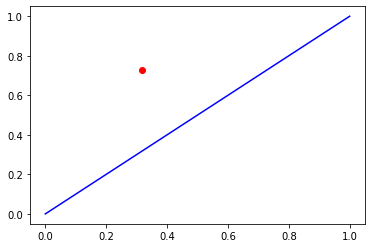

In [972]:
print(" -- CURVA ROC TIC-TAC-TOE VAL. SIMPLE --")
nb = ClasificadorNaiveBayes(True)
nb.entrenamiento(dataset2,estrategia_simple_2.particiones[0].indicesTrain)
pred = nb.clasifica(dataset2,estrategia_simple_2.particiones[0].indicesTest)
matriz = nb.matrizConfusion(dataset2,estrategia_simple_2.particiones[0].indicesTest,pred)
print(" -- MATRIZ DE CONFUSION -- ")
print(matriz)
nb.curvaROC()

 -- CURVA ROC GERMAN VAL. SIMPLE --
 -- MATRIZ DE CONFUSION -- 
[[177  44]
 [ 31  48]]


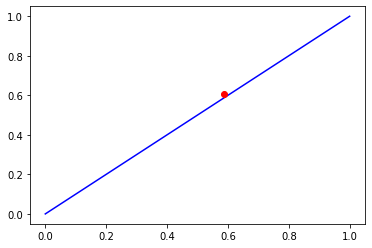

In [974]:
print(" -- CURVA ROC GERMAN VAL. SIMPLE --")
nb = ClasificadorNaiveBayes(True)
nb.entrenamiento(dataset3,estrategia_simple_3.particiones[0].indicesTrain)
pred = nb.clasifica(dataset3,estrategia_simple_3.particiones[0].indicesTest)
matriz = nb.matrizConfusion(dataset3,estrategia_simple_3.particiones[0].indicesTest,pred)
print(" -- MATRIZ DE CONFUSION -- ")
print(matriz)
nb.curvaROC()

 -- CURVA ROC TIC-TAC-TOE VAL. CRUZADA --
MATRIZ DE CONFUSION 1
[[ 36  18]
 [ 51 135]]
MATRIZ DE CONFUSION 2
[[ 41  30]
 [ 39 130]]
MATRIZ DE CONFUSION 3
[[ 36  17]
 [ 50 136]]
MATRIZ DE CONFUSION 4
[[ 27  18]
 [ 52 142]]


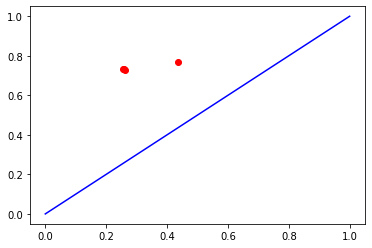

In [983]:
print(" -- CURVA ROC TIC-TAC-TOE VAL. CRUZADA --")
nb = ClasificadorNaiveBayes(True)

i = 1
for particion in estrategia_cruzada_2.particiones:
    nb.entrenamiento(dataset2, particion.indicesTrain)
    pred = nb.clasifica(dataset2, particion.indicesTest)
    matriz = nb.matrizConfusion(dataset2, particion.indicesTest, pred)
    print("MATRIZ DE CONFUSION" , str(i))
    print(matriz)
    i += 1
nb.curvaROC()

 -- CURVA ROC GERMAN VAL. CRUZADA --
MATRIZ DE CONFUSION 1
[[153  41]
 [ 20  36]]
MATRIZ DE CONFUSION 2
[[141  46]
 [ 24  39]]
MATRIZ DE CONFUSION 3
[[156  29]
 [ 29  36]]
MATRIZ DE CONFUSION 4
[[146  35]
 [ 31  38]]


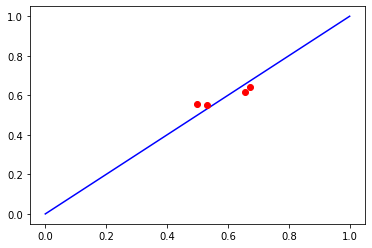

In [982]:
print(" -- CURVA ROC GERMAN VAL. CRUZADA --")
nb = ClasificadorNaiveBayes(True)
i = 1
for particion in estrategia_cruzada_3.particiones:
    nb.entrenamiento(dataset3, particion.indicesTrain)
    pred = nb.clasifica(dataset3, particion.indicesTest)
    matriz = nb.matrizConfusion(dataset3, particion.indicesTest, pred)
    print("MATRIZ DE CONFUSION" , str(i))
    print(matriz)
    i += 1
nb.curvaROC()

 -- ANÁLISIS ROC GERMAN SKLEARN VAL. SIMPLE -- 
MATRIZ CONFUSION
[[ 15  53]
 [  0 124]]


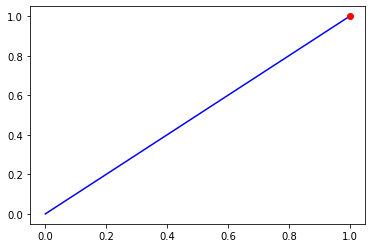

In [992]:
print(" -- ANÁLISIS ROC GERMAN SKLEARN VAL. SIMPLE -- ")
X_train, X_test, y_train, y_test = validacion_simple_sklearn(dataset2, 0.8)
pred =  nb_sklearn(X_train, y_train, X_test, "Gaussian")

matriz, tpr, fpr = matriz_confusion_sklearn(pred,y_test)
print("MATRIZ CONFUSION")
print(matriz)
curvaROC_sklearn(fpr,tpr)

 -- ANÁLISIS ROC TIC-TAC-TOE SKLEARN VAL. SIMPLE -- 
MATRIZ CONFUSION
[[105  35]
 [ 32  28]]


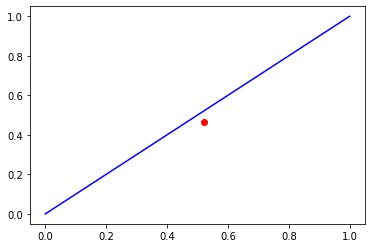

In [991]:
print (" -- ANÁLISIS ROC TIC-TAC-TOE SKLEARN VAL. SIMPLE -- ")
X_train, X_test, y_train, y_test = validacion_simple_sklearn(dataset3, 0.8)
pred =  nb_sklearn(X_train, y_train, X_test)

matriz, tpr, fpr = matriz_confusion_sklearn(pred,y_test)
print("MATRIZ CONFUSION")
print(matriz)
curvaROC_sklearn(fpr,tpr)

Solo se han realizado análisis ROC para el caso de los datasets "tic-tac-toe" y "german", ya que la clasificación en ambos casos es binaria, mientras que el dataset "lenses.data" clasifica entre 3 clases distintas.

En todos los casos se ha utilizado la corrección de Laplace, ya que generamos menos gráficas y los valores aplicando Laplace en "German.data" y "Tic-tac-toe.data" son muy similares que en el caso de no aplicarlos.

Para el caso de SKLearn, solamente se ha analizado utilizando validación simple, ya que para el caso de validación cruzada, no hemos visto ninguna función que nos de la predicción por partición y sería necesario para estimar correctamente las tasas de falsos positivos y verdaderos positivos.

<h4> NAIVE BAYES PROPIO - VAL. SIMPLE </h4>
<br></br>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#ccc;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#fff;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#f0f0f0;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-uzvj{font-weight:bold;border-color:inherit;text-align:center;vertical-align:middle}
</style>
<table class="tg">
  <tr>
    <th class="tg-7btt">DATOS<br></th>
    <th class="tg-7btt">LAPLACE</th>
    <th class="tg-7btt">ERROR</th>
    <th class="tg-7btt">DESV. TÍPICA</th>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">Lenses</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.375</td>
    <td class="tg-c3ow">-</td>
  </tr>
  <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0.125</td>
    <td class="tg-c3ow">-</td>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">Tic-Tac-Toe</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.295<br></td>
    <td class="tg-c3ow">-</td>
  </tr>
  <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0.309</td>
    <td class="tg-c3ow">-</td>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">German</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.24</td>
    <td class="tg-c3ow">-</td>
  </tr>
  <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0.243<br></td>
    <td class="tg-c3ow">-</td>
  </tr>
</table>

<h4>NAIVE BAYES PROPIO - VAL. CRUZADA</h4>
<br></br>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#ccc;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#fff;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#f0f0f0;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-uzvj{font-weight:bold;border-color:inherit;text-align:center;vertical-align:middle}
</style>
<table class="tg">
  <tr>
    <th class="tg-7btt">DATOS<br></th>
    <th class="tg-7btt">LAPLACE</th>
    <th class="tg-7btt">ERROR</th>
    <th class="tg-7btt">DESV. TÍPICA</th>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">Lenses</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.25</td>
    <td class="tg-c3ow">0.083<br></td>
  </tr>
  <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0.417<br></td>
    <td class="tg-c3ow">0.186<br></td>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">Tic-Tac-Toe</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.296</td>
    <td class="tg-c3ow">0.027<br></td>
  </tr>
  <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0.286</td>
    <td class="tg-c3ow">0.003<br></td>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">German</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.244</td>
    <td class="tg-c3ow">0.032<br></td>
  </tr>
  <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0.254</td>
    <td class="tg-c3ow">0.015<br></td>
  </tr>
</table>

<h4>NAIVE BAYES SKLEARN - VALIDACION SIMPLE </h4>
<br></br>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#ccc;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#fff;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#f0f0f0;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-uzvj{font-weight:bold;border-color:inherit;text-align:center;vertical-align:middle}
</style>
<table class="tg">
  <tr>
    <th class="tg-7btt">DATOS<br></th>
    <th class="tg-7btt">LAPLACE</th>
    <th class="tg-7btt">ERROR</th>
    <th class="tg-7btt">DESV. TÍPICA</th>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">Lenses</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.25</td>
    <td class="tg-c3ow">-<br></td>
  </tr>
  <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0.25<br></td>
    <td class="tg-c3ow">-<br></td>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">Tic-Tac-Toe</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.365</td>
    <td class="tg-c3ow">-<br></td>
  </tr>
  <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0.365</td>
    <td class="tg-c3ow">-<br></td>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">German</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.256</td>
    <td class="tg-c3ow">-<br></td>
  </tr>
    <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-<br></td>
  </tr>
</table>

<h4>NAIVE BAYES SKLEARN - VALIDACION CRUZADA </h4>
<br></br>
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;border-color:#ccc;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#fff;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#f0f0f0;}
.tg .tg-c3ow{border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-7btt{font-weight:bold;border-color:inherit;text-align:center;vertical-align:top}
.tg .tg-uzvj{font-weight:bold;border-color:inherit;text-align:center;vertical-align:middle}
</style>
<table class="tg">
  <tr>
    <th class="tg-7btt">DATOS<br></th>
    <th class="tg-7btt">LAPLACE</th>
    <th class="tg-7btt">ERROR</th>
    <th class="tg-7btt">DESV. TÍPICA</th>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">Lenses</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.338</td>
    <td class="tg-c3ow">0.041<br></td>
  </tr>
  <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0.261<br></td>
    <td class="tg-c3ow">0.109<br></td>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">Tic-Tac-Toe</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.351</td>
    <td class="tg-c3ow">0.015<br></td>
  </tr>
  <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">0.351</td>
    <td class="tg-c3ow">0.015<br></td>
  </tr>
  <tr>
    <td class="tg-uzvj" rowspan="2">German</td>
    <td class="tg-c3ow">Si</td>
    <td class="tg-c3ow">0.266</td>
    <td class="tg-c3ow">0.024<br></td>
  </tr>
        <tr>
    <td class="tg-c3ow">No</td>
    <td class="tg-c3ow">-</td>
    <td class="tg-c3ow">-<br></td>
  </tr>
</table>

<h3> CONCLUSIONES </h3>

En vista a los resultados obtenidos podemos observar que nuestro clasificador obtiene mejores resultados que la implementación de SKLearn, en general. Esto puede ser debido a que no hemos sabido explotar la potencia que tiene SKLearn, ya que las funciones tienen muchos parámetros que no hemos tenido tiempo para comprender bien y probarlos. Seguramente, si hubiesemos optimizado esas funcionalidades para cada uno de los datasets los resultados habrían sido muy parecidos o ligeramente mejores que los nuestros.

En cuanto a las ejecuciones con Laplace y sin él, en el único dataset en el que es realmente relevante es en el de <strong>Lenses.data</strong> ya que tiene pocos ejemplos y es fácil que alguno de ellos haga que aparezca un 0 en alguna de las casillas de las tablas de probabilidades. En el caso de SKLearn, podemos observar que hay veces que cuando no tenemos tablas de probabilidad por atributo con 0's hay veces que incluso penaliza un poco, aunque la diferencia es mínima.

Por último, en cuanto a las curvas ROC, creemos que son algo engañosas, ya que hay casos en los que los <Strong>Verdaderos negativos</Strong> provocan que el punto se encuentre por debajo de la línea. Esto nos puede llevar a pensar que nuestro clasificador no es bueno, pero obtenemos tasas de error razonables, este fenómeno es debido a que la tasa de <Strong>Verdaderos negativos</Strong> realmente indica que nuestro modelo está clasificando la clase correctamente, pero a la hora de generar la matriz de confusión no se está comparando con la clase que se acierta, si no con la contraria. Por todo lo anterior, el punto "ROC" aparece, aunque en realidad los resultados no son tan malo como parece si solo miramos la curva.

Un poco al hilo de lo último, quizá sería mejor medir nuestro clasificador por la <Strong>Accuracy</Strong>, que se define con la siguiente fórmula: 

\begin{equation}
Accuracy =  \frac{TP + TN}{T + TN + FP + FN}
\end{equation}

Dandonos una medida más real de la precisión de nuestro clasificador.